In [ ]:
from tools import load
import numpy as np
import matplotlib.pyplot as plt

In [350]:
data = load(to_int=False, line_splitter="")
data = np.array([list(x)  for x  in data])

# next time use y,x not x,y as numpy does :)

# recode if not up start.
x,y = np.where(data == "^")[0][0], np.where(data == "^")[1][0] 
data[data == "."] = 0
data[data == "#"] = 1
#assume free starting field.
data[data == "^"] = 0
data = data.astype(int)


In [351]:
def step(data, pos, direction):

    if direction == "L":
        if data[pos[1]][pos[0]-1] == 0: 
            pos[0] = pos[0] -1
            new_direction = "L"
        else: 
            new_direction = "U"
    elif direction == "R":
        if data[pos[1]][pos[0]+1] == 0: 
            pos[0] = pos[0] +1
            new_direction = "R"
        else: 
            new_direction = "D"

    elif direction == "U":
        if data[pos[1]-1][pos[0]] == 0: 
            pos[1] = pos[1] -1
            new_direction = "U"
        else: 
            new_direction = "R"
    elif direction == "D":
        if data[pos[1]+1][pos[0]] == 0: 
            pos[1] = pos[1] +1
            new_direction = "D"
        else: 
            new_direction = "L"
    return pos, new_direction

In [352]:
def check_out(dims,pos, direction):
    if direction == "L":
        if pos[0] == 0:
            return True
    elif direction == "R":
        if pos[0] == dims[0]:
            return True
    elif direction == "U":
        if pos[1] == 0:
            return True
    elif direction == "D":
        if pos[1] == dims[1]:
            return True
    else: 
        return False

In [353]:
#a 
def walk(x,y,direction, data):
    position = [y,x]
    dims = data.shape[1]-1, data.shape[0]-1 
    memory = data.copy()
    memory[position[1]][position[0]] = -1

    for n in range (1000000):
        position, direction = step(data, position, direction)

        memory[position[1]][position[0]] -= 1
        if check_out(dims, position, direction): 
            break
    return (memory < 0).sum()

In [354]:
walk(x,y,"U",data)

5269

In [355]:
#b
# we need a memory of positions + direction
dims = data.shape[1]-1, data.shape[0]-1 #x,y
direction = "U"
print(dims)
solution = []
# run through all possible obstacle positions: 

for i_x in range(10):
    for i_y in range(10):
        if data[i_y][i_x] == 1:
            pass # not mecessary
        elif x == i_x and y == i_y:
            pass # illegal
        else: 
            position = [y,x]
            direction = "U"

            mem = []
            for a in range(dims[0]+1):
                mem.append([[] for b in range(dims[1]+1)])
            alter_data = data.copy()
            alter_data[i_y][i_x] = 1
            mem[y][x] = [direction]

            for n in range (100000000):
                    position, direction = step(alter_data, position, direction)
                    if direction in mem[position[0]][position[1]]:
                        solution.append((i_x,i_y))      
                        break
                    else:
                        mem[position[0]][position[1]].append(direction)
                    if check_out(dims, position, direction): 
                        break

(129, 129)


In [357]:
position

[129, 69]

In [356]:
len(solution)

0

In [ ]:
data = np.array([list(x)  for x  in data])

In [348]:
solution

[(1, 8), (3, 6), (3, 8), (6, 7), (7, 7), (7, 9)]

In [321]:
len(memoryview)

9

In [316]:
d

[7, 9]

In [319]:
len(mem)

9

In [317]:
mem

[[[], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], ['U', 'R'], ['L', 'U']],
 [[], [], [], [], ['U', 'R'], ['U'], ['L', 'U'], ['R'], ['L']],
 [[], [], [], [], ['R'], [], ['L'], ['R'], ['L']],
 [[], ['U', 'R'], ['U'], ['U'], ['U', 'R'], ['U'], ['U', 'L'], ['R'], ['L']],
 [[], ['R'], [], [], ['R'], [], ['L'], ['R'], ['L']],
 [[], ['R'], [], [], ['R', 'D'], ['D'], ['L', 'D'], ['D', 'R'], ['D', 'L']],
 [[], ['R'], [], [], [], [], ['L'], ['R', 'D'], ['D']],
 [[], ['R', 'D'], ['D'], ['D'], ['D'], ['D'], ['D', 'L'], [], []]]

In [311]:
solution

[]

In [266]:
 {0 for y in range(data.shape[0]-1)}

{0}

In [136]:
dims

(9, 9)

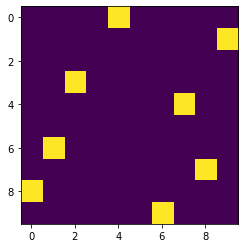

In [110]:
plt.imshow(data)

In [124]:
position

[9, 2]

In [34]:
x,y = np.where(data == "^")[0][0], np.where(data == "^")[1][0] 

In [36]:
y

4

In [20]:
data

[['.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '#'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '#', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '#', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '#', '.', '.', '^', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
 ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '#', '.', '.', '.']]